In [ ]:
# This notebook contains the code for the experiments in Section 6

In [1]:
%run Correlators_tools.ipynb

### Model characteristics

In [2]:
m = 0 # number of polynomials -1 (i.e. the total number is m+1)

t = 0
T = 2.0
time_sequence = np.linspace(t, T, m+2)[1:]

b1 = 0.2
b0 = 0
sigma2 = 0.06
print('b1, b0, sigma2 = ', b1, ',', b0,',', sigma2)

polyp_coeff_vector = np.array([b0, b1, 0, 0, sigma2])

initial_state = 2.0
r = b1

Y = poly_process_sparse(polyp_coeff_vector)

b1, b0, sigma2 =  0.2 , 0 , 0.06


In [4]:
order = 1
mean = (e_n_i(order+1,order+1).transpose()).dot(Y.exp_generator_matrix_scipy(order, t=T)).dot(H_n_x(order, initial_state))
mean = mean[0,0]
# initial_state*np.exp(b1*(T-t))

order = 2
std = (e_n_i(order+1,order+1).transpose()).dot(Y.exp_generator_matrix_scipy(order, t=T)).dot(H_n_x(order, initial_state))
std = np.sqrt(std[0,0]-mean**2)
# np.sqrt(initial_state**2*np.exp(b1*2*(T-t))*(np.exp(sigma2*(T-t))-1))

cv = std/mean # coefficient of variation
print('mean = ', mean)
print('std = ', std)
print('cv = ', cv)

mean =  2.9836493952825407
std =  1.0653627766049076
cv =  0.3570670127292291


## PRICING

In [5]:
# Preliminary calculations for the Hermite series
# This does not depend on the strike price

N = 100 # truncation number
expG_N = lambda t: Y.exp_generator_matrix_scipy(n = N*(m+1), t=t)
#E_matrix = mE_n_matrix(N, m)
#D_matrix = mD_n_matrix(N, m)

In [6]:
H_N = np.zeros(N+1) 
H_N[0] = 1
for n in range(1,N+1):
    print('----------------- n = ', n)
    H_N_n = 0
    index_list = multi_index(m, n)
    for i in index_list:
        coeff = multi_coeff(i)
        max_power = np.max(i)
        non_zero_count = np.count_nonzero(i)
        non_zero_position = np.nonzero(i)
        vectors_list = coeff_vectors_list(i[non_zero_position], max_power)
        #correlator = Y.correlator_formula(max_power, non_zero_count-1, time_sequence[non_zero_position], vectors_list, initial_state)
        expG_n = lambda t: csr(expG_N(t).toarray()[:(max_power*non_zero_count+1), :(max_power*non_zero_count+1)])
        correlator = Y.correlator_formula_2(expG_n, max_power, non_zero_count-1, time_sequence[non_zero_position], vectors_list, initial_state)
        #correlator = Y.correlator_formula_3(expG_n, E_matrix[max_power-1][:non_zero_count], D_matrix[max_power-1][:non_zero_count], max_power, non_zero_count-1, time_sequence[non_zero_position], vectors_list, initial_state)
        #correlator = (e_n_i(max_power+1,max_power+1).transpose()).dot(Y.exp_generator_matrix_scipy(max_power, t=T)).dot(H_n_x(max_power, initial_state))
        H_N_n += coeff*correlator
    H_N[n] = H_N_n/float(((m+1)**n))

print('H_N = ', H_N)

----------------- n =  1
----------------- n =  2


/opt/homebrew/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


----------------- n =  3
----------------- n =  4
----------------- n =  5
----------------- n =  6
----------------- n =  7
----------------- n =  8
----------------- n =  9
----------------- n =  10
----------------- n =  11
----------------- n =  12
----------------- n =  13
----------------- n =  14
----------------- n =  15
----------------- n =  16
----------------- n =  17
----------------- n =  18
----------------- n =  19
----------------- n =  20
----------------- n =  21
----------------- n =  22
----------------- n =  23
----------------- n =  24
----------------- n =  25
----------------- n =  26
----------------- n =  27
----------------- n =  28
----------------- n =  29
----------------- n =  30
----------------- n =  31
----------------- n =  32
----------------- n =  33
----------------- n =  34
----------------- n =  35
----------------- n =  36
----------------- n =  37
----------------- n =  38
----------------- n =  39
----------------- n =  40
----------------- n

In [7]:
# Strike price
K = 2

In [8]:
# CLOSED FORMULA #only for m = 0
d1 = (np.log(initial_state/K)+(b1+sigma2/2)*(T-t))/np.sqrt(sigma2*(T-t))
d2 = d1- np.sqrt(sigma2*(T-t))
price_exact = initial_state*norm.cdf(d1)-K*norm.cdf(d2)*np.exp(-r*(T-t))
print('price_exact = ', price_exact)

price_exact =  0.6939085434029806


In [9]:
# MONTE CARLO SIMULATIONS

N_mc = 100 # number of samples
IT = 20000 # number of iterations for each sample

price_MC = np.zeros(N_mc)
time_MC = np.zeros(N_mc)
for mc in range(N_mc):
    print(mc)
    exp = np.zeros(IT)
    a = time.time()
    for it in range(IT):
        delta = (T-t)/(m+1)
        Z = np.zeros(m+2)
        Z[0] = initial_state
        for k in np.arange(m+1):
            Z[k+1] = Z[k]*np.exp((b1 - sigma2/2)*delta + np.sqrt(sigma2)*np.random.normal(loc=0, scale = np.sqrt(delta)))
        Z = Z[1:]
        exp[it] = max(np.sum(Z)/(m+1)-K,0)*np.exp(-r*(T-t))
    price_MC[mc] = np.sum(exp)/IT
    b = time.time()
    time_MC[mc] = b-a
    
print('MC_price_interval = [', np.mean(price_MC) - np.std(price_MC), ', ', np.mean(price_MC) + np.std(price_MC), ']')
print('std = ', np.std(price_MC))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
MC_price_interval = [ 0.689937997943069 ,  0.6984797242168391 ]
std =  0.004270863136885113


In [10]:
accuracy_MC = -np.log10(np.abs(np.mean(price_MC)-price_exact)/price_exact)
print('accuracy_MC = ', accuracy_MC)

accuracy_MC =  3.363721338635247


### Pricing with generalized Hermite polynomials

In [11]:
# Parameters for the Hermite series 
min_scale = std/np.sqrt(2) #\underline{b}_{\sigma}
print('min_scale = ', min_scale)

drift = mean
scale = min_scale*2
ratio = (K-drift)/scale

print('K = ', K)
print('drift = ', drift)
print('scale = ', scale)
print('ratio = ', ratio)

min_scale =  0.7533252437610591
K =  2
drift =  2.9836493952825407
scale =  1.5066504875221183
ratio =  -0.6528716536642014


In [12]:
E_N = np.zeros(N+1) 
E_N[0] = 1
for j in range(1, N+1):
    E_N_j = 0
    for i in range(j+1):
        E_N_j += float(newton(j,i))*H_N[i]*((-drift)**(j-i))
    E_N[j] = E_N_j/(scale**(j))    

print('E_N = ', E_N)

E_N =  [1.00000000e+000 0.00000000e+000 5.00000000e-001 3.94822249e-001
 1.32412017e+000 3.23678312e+000 1.15384124e+001 4.62770835e+001
 2.21812989e+002 1.23233162e+003 7.90989709e+003 5.82310316e+004
 4.89351560e+005 4.67573884e+006 5.06381275e+007 6.20017370e+008
 8.56534965e+009 1.33288441e+011 2.33335555e+012 4.59054551e+013
 1.01413469e+015 2.51426375e+016 6.99222172e+017 2.18058103e+019
 7.62419847e+020 2.98836754e+022 1.31304135e+024 6.46758234e+025
 3.57159399e+027 2.21153853e+029 1.53571133e+031 1.19615912e+033
 1.04525615e+035 1.02496042e+037 1.12808606e+039 1.39389664e+041
 1.93408398e+043 3.01424998e+045 5.27768802e+047 1.03840729e+050
 2.29639958e+052 5.70920510e+054 1.59603070e+057 5.01798255e+059
 1.77467997e+062 7.06139173e+064 3.16163648e+067 1.59313519e+070
 9.03599195e+072 5.76953543e+075 4.14765798e+078 3.35748070e+081
 3.06069695e+084 3.14244404e+087 3.63409318e+090 4.73416696e+093
 6.94776065e+096 1.14876681e+100 2.14009996e+103 4.49239938e+106
 1.06264819e+110 2

k =  1 , price =  0.8155299309035403
k =  2 , price =  0.8155299309035403 ,  0.7562922808648168
k =  3 , price =  0.7341368186542264 ,  1.2367708215468407
k =  4 , price =  0.7201497783382971 ,  1.4223179650972553
k =  5 , price =  0.7098437100202009 ,  1.638945625764922
k =  6 , price =  0.706600314453273 ,  1.7377800053941146
k =  7 , price =  0.7063678975102131 ,  1.7458067054715256
k =  8 , price =  0.6972677844295045 ,  2.315061068842053
k =  9 , price =  0.698156641193878 ,  2.213107728942098
k =  10 , price =  0.7091145660207234 ,  1.6592866024279491
k =  11 , price =  0.7007812870902274 ,  2.004172086965902
k =  12 , price =  0.6486085456073618 ,  1.185204053678218
k =  13 , price =  0.7169394992365548 ,  1.478990272075981
k =  14 , price =  0.9913564301856967 ,  0.36789134672889173
k =  15 , price =  0.33560919531526223 ,  0.28705621657324176
k =  16 , price =  -1.732669412460542 ,  -0.543692013394474
k =  17 , price =  6.504770945811018 ,  -0.922938357180995
k =  18 , price =

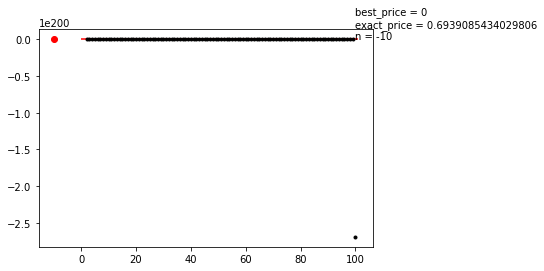

In [13]:
Hprice = np.ones(N+1)*(scale*norm.pdf(ratio)+(mean-K)*(1-norm.cdf(ratio)))*np.exp(-r*(T-t))
notachieved = 1
best_n = -10
best = 0
print('k = ', 1, ', price = ', Hprice[0])
if (-np.log10(abs(price_exact-Hprice[0])/price_exact) > accuracy_MC) and notachieved:
    notachieved = 0
    best = price2[0]
    best_n = 1
    print('------> Accuracy 10**(-3) for k = ', 1)

for k in range(2,N+1):
    v_k = hermite(k).c[::-1]
    Hprice[k:] += scale*norm.pdf(ratio)*(hermite(k-2)(ratio)/float(math.factorial(k))*v_k.dot(E_N[:(k+1)]))*np.exp(-r*(T-t))
    print('k = ', k, ', price = ', Hprice[k-1], ', ', -np.log10(abs(price_exact-Hprice[k-1])/price_exact))
    plt.plot(k, Hprice[k-1], 'k.')
    if (-np.log10(abs(price_exact-Hprice[k-1])/price_exact) > accuracy_MC) and notachieved:
        notachieved = 0
        best = Hprice[k-1]
        best_n = k
        print('------> Accuracy 10**(-3) for k = ', k)
    if not notachieved and (k == best_n+15):
        not_casual_bump = 1
        for j in range(best_n, k):
            not_casual_bump = not_casual_bump*(-np.log10(abs(price_exact-Hprice[j-1])/price_exact)>accuracy_MC)
        if not not_casual_bump: notachieved = 1
    
plt.hlines(y = price_exact, xmin=0, xmax = N+1, colors ='red')
s = "best_price = {} \nexact_price = {}\nn = {}"
plt.text(x = N, y = price_exact, s = s.format(best, price_exact, best_n));  
plt.plot(best_n, best, 'ro');

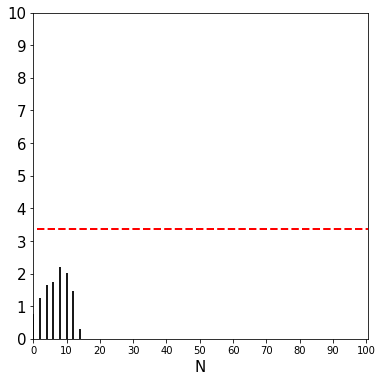

In [14]:
# plots
range_N = np.arange(0,N+1,2)
f = plt.figure(figsize = (6,6))
ax = plt.axes()
plt.bar(range_N, -np.log10(np.abs(Hprice[range_N]-price_exact)/price_exact), alpha=0.9, color='black', width=0.6);
plt.bar(best_n-1, -np.log10(np.abs(Hprice[best_n-1]-price_exact)/price_exact), alpha=0.9, color='red', width=0.8);
plt.hlines(y = 0, xmin = 1, xmax = N+0.5,linestyle = 'solid', linewidth = 1, color='black');
plt.hlines(y = accuracy_MC, xmin = 1, xmax = N+0.5,linestyle = 'dashed', linewidth = 2, color='red');
plt.xlim([1.,N+0.5]);
plt.ylim([0, 10])
plt.xlabel('N', fontsize=15)
plt.yticks(np.arange(0,11),np.arange(0,11), fontsize=15)
plt.xticks(range_N[::5], range_N[::5], fontsize=10);
#ax.get_xticklabels()[int((best_n-1)/10)].set_color("red")
#f.savefig('Plots_BS2/plot_BS2_4e.pdf', bbox_inches = 'tight', pad_inches = 0.01)